In [27]:
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# create the raw dataframe from the CSV
raw_data = pd.read_csv("raw-2005-2019 (4).csv")
regions = pd.read_csv("Country divided by regions(world Bank).csv")

# Drop unsused columns and rename needed columns for region
regions = regions[["Region", "TableName"]]
regions = regions.rename(columns={"TableName" : "Country name"})

# Create the the dataframe being used for the gini index comparison 
gini_index = pd.merge(raw_data.dropna(), regions)
gini_index_2010 = gini_index.loc[gini_index["year"] == 2010]
gini_index_2015 = gini_index.loc[gini_index["year"] == 2015]

#Create main clean data without the GINI index
clean_data = raw_data.drop("GINI index (World Bank estimate)", 1)

#Get data for the 3 most recent years
clean_data = clean_data.loc[clean_data["year"] >= 2017]


merged_data = pd.merge(clean_data, regions, on = "Country name")

#### Add the countries that were left out 

In [3]:
merged_renamed = merged_data.rename(columns={"Country name": "Country Name", "Social support": "Social Support", "Healthy life expectancy at birth": "HALE", "Life Ladder": "Happiness Score", "Log GDP per capita": "GDP per Capita(ln)"})

In [4]:
# Create an empty list to store the values that are not found in the regions list
not_in_list = []

# Create a list for
regions_list = regions["Country name"].tolist()

for index, row in clean_data.iterrows():
      if row["Country name"] not in regions_list:
            not_in_list.append(row["Country name"])
# Drop the duplicates to see the countries excluded from the merge due to country name issues
not_in_list = list(dict.fromkeys(not_in_list))

#After i had the unique countries that did not get merged i checked the CSV file to see why.
#If it was in the CSV file but with a different name i updated the name in the CSV file to match our dataframe
#If the country was not in the CSV file i added the data by adding its name and appropriate region that matches the CSV (Laos and Palestinian Territories)

#Print len of list that contains valued not merged to make sure that no conutries from clean data set were left out and that they all received a region
print(len(not_in_list))

#print the len of your merged data and orginal dataframe to make sure they match just for good measures and all orginal data is represented
print(len(merged_renamed), len(clean_data))

0
427 427


In [5]:
merged_renamed.loc[merged_renamed["Country Name"] == "United States"]

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
403,United States,2017,6.991759,10.905420,0.921003,68.400002,0.868497,0.194489,0.681191,0.826555,0.692602,1.552104,1.880688,0.268986,North America
404,United States,2018,6.882685,10.927395,0.903856,68.300003,0.824607,0.113378,0.709928,0.815383,0.758395,1.482865,2.119374,0.307928,North America
405,United States,2019,6.943701,10.944225,0.916691,68.199997,0.836139,0.141645,0.706716,0.814985,NaN,NaN,1.789670,0.257740,North America


#### Filter data set to only include countries that have data for all 3 years

In [6]:
#Get a working copy of the merged data to work with
loop_df = pd.DataFrame.copy(merged_renamed)
# loop_df = loop_df.loc[0:10]
#Set global variables
count = 0
country = ""
countries = []

# Create a for loop to get the countries that have data for all 3 years (2017 - 2019)
for index, row in loop_df.iterrows():
    if country != row["Country Name"]:
        country = row["Country Name"]
        count = 0
    elif country == row["Country Name"]:
        count += 1
        if count == 2:
            countries.append( row["Country Name"])

# Print the lenght of the countries with all 3 years and original data frame to see how many we are losing
print(len(countries))
print(len(loop_df["Country Name"].unique()))

#Get the new Dataframe that countries countries that have data for all 3 years
Final_df = loop_df.set_index("Country Name").loc[countries].reset_index()

#Check to see if lenght matches length of countries lists
Final_df["Country Name"].nunique()


129
153


129

#### Final Data sets

In [7]:
#Gini Data set 
gini_index
gini_index_2010
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Turkey,2015,5.514465,10.056709,0.851225,65.599998,0.653197,-0.017012,0.806076,0.460246,-0.930817,0.056615,2.530940,0.458964,0.429,Europe & Central Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia
638,United Kingdom,2015,6.515445,10.571567,0.935986,71.699997,0.832926,0.300925,0.456134,0.797785,0.907792,1.819708,1.753815,0.269178,0.332,Europe & Central Asia
651,Uruguay,2015,6.628080,9.900736,0.891493,68.699997,0.916880,-0.038354,0.673476,0.892661,1.073821,0.745666,2.191727,0.330673,0.402,Latin America & Caribbean


In [8]:
#Data set with the countries that have data for all 3 years 
Final_df

,Country Name,year,Happiness Score,GDP per Capita(ln),Social Support,HALE,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,Region
0,Afghanistan,2017,2.661718,7.472197,0.490880,52.799999,0.427011,-0.110382,0.954393,0.496349,-1.896539,-1.440218,1.454051,0.546283,South Asia
1,Afghanistan,2018,2.694303,7.458603,0.507516,52.599998,0.373536,-0.082319,0.927606,0.424125,-1.870725,-1.438761,1.408344,0.522712,South Asia
2,Afghanistan,2019,2.375092,7.458469,0.419973,52.400002,0.393656,-0.096549,0.923849,0.351387,NaN,NaN,1.412905,0.594884,South Asia
3,Albania,2017,4.639548,9.376133,0.637698,68.400002,0.749611,-0.029357,0.876135,0.669241,0.290326,-0.128311,2.682105,0.578096,Europe & Central Asia
4,Albania,2018,5.004403,9.417863,0.683592,68.699997,0.824212,0.008337,0.899129,0.713300,0.294235,-0.129403,2.640531,0.527642,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,Zambia,2018,4.041488,8.228971,0.717720,55.299999,0.790626,0.037525,0.810731,0.702698,-0.089234,-0.500724,2.783419,0.688711,Sub-Saharan Africa
383,Zambia,2019,3.306797,8.224403,0.637894,55.799999,0.811040,0.066340,0.831956,0.743407,NaN,NaN,2.860172,0.864937,Sub-Saharan Africa
384,Zimbabwe,2017,3.638300,7.851042,0.754147,55.000000,0.752826,-0.091540,0.751208,0.806428,-0.952548,-1.350873,2.656848,0.730244,Sub-Saharan Africa
385,Zimbabwe,2018,3.616480,7.896704,0.775388,55.599998,0.762675,-0.063282,0.844209,0.710119,-0.920905,-1.323000,2.498696,0.690919,Sub-Saharan Africa


In [9]:
Final_df["Country Name"].nunique()

129

In [10]:
gini_index_2015

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
22,Armenia,2015,4.348320,9.008449,0.722551,66.000000,0.551027,-0.186535,0.901462,0.594143,-0.394313,-0.210170,2.237644,0.514600,0.324,Europe & Central Asia
35,Austria,2015,7.076447,10.697696,0.928110,72.099998,0.900305,0.102583,0.557480,0.798263,1.263306,1.564229,1.762817,0.249110,0.305,Europe & Central Asia
46,Belarus,2015,5.718908,9.753776,0.924073,65.199997,0.622753,-0.095122,0.668678,0.583727,-0.677531,-0.650102,2.004021,0.350420,0.256,Europe & Central Asia
56,Belgium,2015,6.904219,10.641150,0.885209,71.400002,0.869475,0.064905,0.468785,0.805178,0.987267,1.440750,1.511811,0.218969,0.277,Europe & Central Asia
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,Turkey,2015,5.514465,10.056709,0.851225,65.599998,0.653197,-0.017012,0.806076,0.460246,-0.930817,0.056615,2.530940,0.458964,0.429,Europe & Central Asia
628,Ukraine,2015,3.964543,8.917973,0.909440,63.700001,0.430592,-0.011267,0.952473,0.574076,-1.024300,-0.727938,1.956619,0.493530,0.255,Europe & Central Asia
638,United Kingdom,2015,6.515445,10.571567,0.935986,71.699997,0.832926,0.300925,0.456134,0.797785,0.907792,1.819708,1.753815,0.269178,0.332,Europe & Central Asia
651,Uruguay,2015,6.628080,9.900736,0.891493,68.699997,0.916880,-0.038354,0.673476,0.892661,1.073821,0.745666,2.191727,0.330673,0.402,Latin America & Caribbean


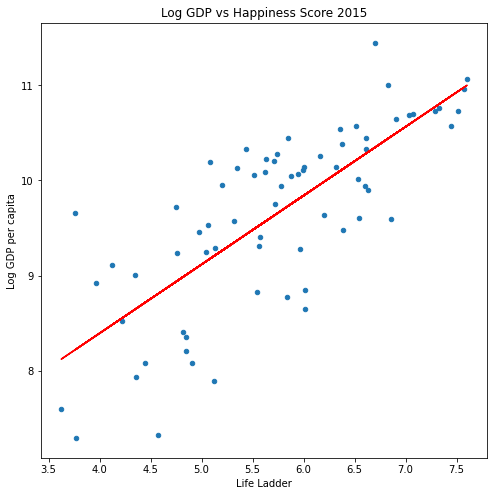

0.7619276931775727


In [11]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Life Ladder", y="Log GDP per capita", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gdp = gini_index_2015.iloc[:, 3]
correlation = st.pearsonr(happiness, gdp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness, gdp)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

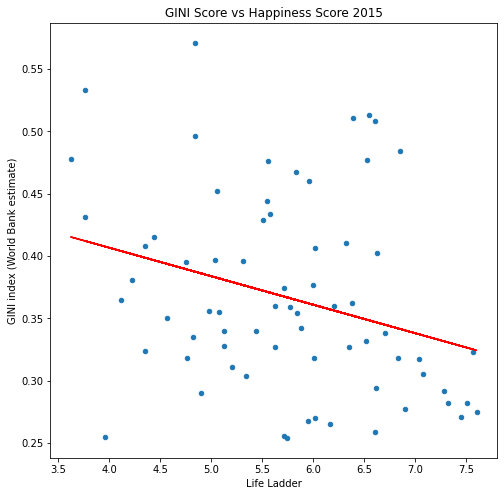

-0.2917016957676174


In [12]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2015.plot(kind="scatter", x="Life Ladder", y="GINI index (World Bank estimate)", grid=False, figsize=(8,8),
              title="GINI Score vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_index_2015.iloc[:, 2]
gini = gini_index_2015.iloc[:, 14]
correlation = st.pearsonr(happiness, gini)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness, gini)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

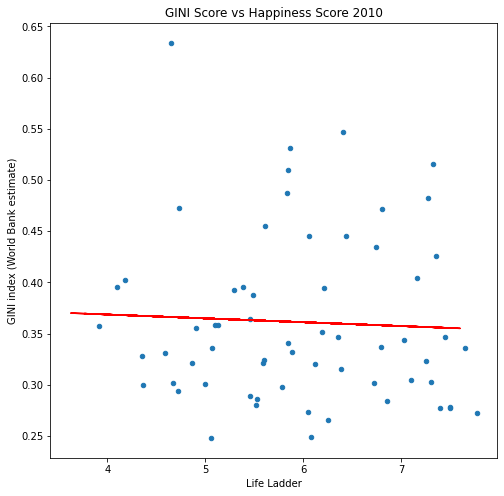

-0.04677084192343674


In [13]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2010.plot(kind="scatter", x="Life Ladder", y="GINI index (World Bank estimate)", grid=False, figsize=(8,8),
              title="GINI Score vs Happiness Score 2010")

#Calculate the correlation coefficient
happiness_2010 = gini_index_2010.iloc[:, 2]
gini_2010 = gini_index_2010.iloc[:, 14]
correlation = st.pearsonr(happiness_2010, gini_2010)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness_2010, gini_2010)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

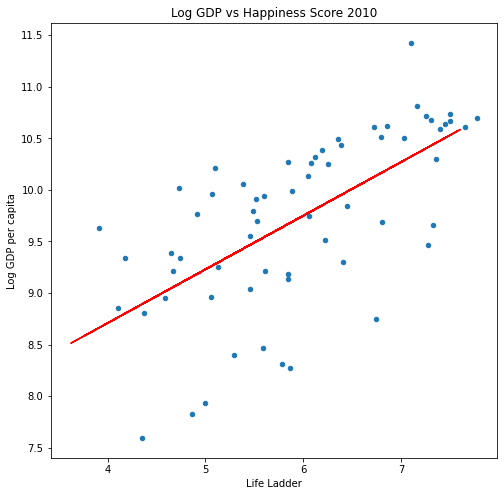

0.641714441805099


In [14]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
gini_index_2010.plot(kind="scatter", x="Life Ladder", y="Log GDP per capita", grid=False, figsize=(8,8),
              title="Log GDP vs Happiness Score 2010")

#Calculate the correlation coefficient
happiness_2010 = gini_index_2010.iloc[:, 2]
gdp_2010 = gini_index_2010.iloc[:, 3]
correlation = st.pearsonr(happiness_2010, gdp_2010)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness_2010, gdp_2010)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

In [15]:
# Read in csv file for gini data
gini_data = pd.read_csv("API_SI.POV.GINI_DS2_en_csv_v2_1993647.csv")

#Reset column headers
gini_data.columns = gini_data.iloc[3]

#Drop extra rows at top of data frame
gini_data = gini_data.drop(0)
gini_data = gini_data.drop(1)
gini_data = gini_data.drop(2)
gini_data = gini_data.drop(3)

#Narrow down dataframe to Country Name, 2014, and 2015
gini_data = gini_data[['Country Name',2014.0, 2015.0]]

#Rename year columns
gini_data = gini_data.rename(columns={2014.0:"2014",2015.0:"2015"})

#Drop Null Values
gini_data = gini_data.dropna()

#Reset index
gini_data = gini_data.reset_index(drop=True)

gini_data

3,Country Name,2014,2015
0,Albania,34.6,32.9
1,Armenia,31.5,32.4
2,Austria,30.5,30.5
3,Belgium,28.1,27.7
4,Bulgaria,37.4,38.6
5,Belarus,27.2,25.6
6,Bolivia,47.8,46.7
7,Brazil,52.1,51.9
8,Switzerland,32.5,32.3
9,China,39.2,38.6


In [16]:
gini_data["Change in Gini"] = gini_data["2015"] - gini_data["2014"]
gini_data

3,Country Name,2014,2015,Change in Gini
0,Albania,34.6,32.9,-1.7
1,Armenia,31.5,32.4,0.9
2,Austria,30.5,30.5,0.0
3,Belgium,28.1,27.7,-0.4
4,Bulgaria,37.4,38.6,1.2
5,Belarus,27.2,25.6,-1.6
6,Bolivia,47.8,46.7,-1.1
7,Brazil,52.1,51.9,-0.2
8,Switzerland,32.5,32.3,-0.2
9,China,39.2,38.6,-0.6


In [20]:
#Store country name and log gdp in a new dataframe
gdp_log = gini_index_2015[["Country name", "Log GDP per capita", "Life Ladder"]]
gdp_log = gdp_log.rename(columns={"Country name":"Country Name"})
gdp_log

#merge new dataframe with gini_data
gini_v_gdp_df = pd.merge(gini_data, gdp_log, on=["Country Name"])
gini_v_gdp_df

,Country Name,2014,2015,Change in Gini,Log GDP per capita,Life Ladder
0,Armenia,31.5,32.4,0.9,9.008449,4.348320
1,Austria,30.5,30.5,0.0,10.697696,7.076447
2,Belgium,28.1,27.7,-0.4,10.641150,6.904219
3,Belarus,27.2,25.6,-1.6,9.753776,5.718908
4,Bolivia,47.8,46.7,-1.1,8.770963,5.834329
5,Brazil,52.1,51.9,-0.2,9.602870,6.546897
6,Switzerland,32.5,32.3,-0.2,10.956487,7.572137
7,Colombia,52.7,51.1,-1.6,9.481480,6.387572
8,Costa Rica,48.6,48.4,-0.2,9.589951,6.854004
9,Cyprus,35.6,34.0,-1.6,10.331148,5.439161


In [21]:
gini_v_gdp_df.count()

Country Name          49
2014                  49
2015                  49
Change in Gini        49
Log GDP per capita    49
Life Ladder           49
dtype: int64

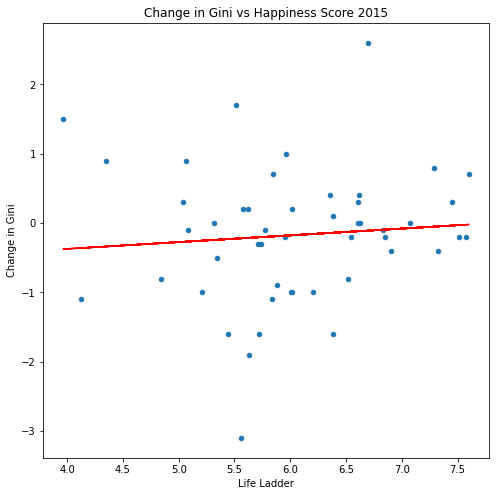

0.08706611224318443


In [22]:
#use pandas to plot a scatter plot
gini_v_gdp_df.plot(kind="scatter", x="Life Ladder", y="Change in Gini", grid=False, figsize=(8,8),
              title="Change in Gini vs Happiness Score 2015")

#Calculate the correlation coefficient
happiness = gini_v_gdp_df.iloc[:, 5]
gini = gini_v_gdp_df.iloc[:, 3]
correlation = st.pearsonr(happiness, gini)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness, gini)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

In [30]:
#Move gini index into a list
gini_values = gini_index_2015["GINI index (World Bank estimate)"]

#sort gini index
gini_values.sort_values()
print(gini_values)

22     0.324
35     0.305
46     0.256
56     0.277
58     0.478
       ...  
614    0.429
628    0.255
638    0.332
651    0.402
661    0.571
Name: GINI index (World Bank estimate), Length: 70, dtype: float64


In [31]:
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = gini_values.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of temperatures is: 0.3125
The upper quartile of temperatures is: 0.41374999999999995
The interquartile range of temperatures is: 0.10124999999999995
The the median of temperatures is: 0.3545 
Values below 0.16062500000000007 could be outliers.
Values above 0.5656249999999998 could be outliers.


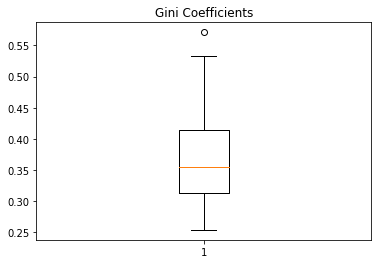

In [32]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
props = dict(markerfacecolor = 'red')
plt.boxplot(gini_values)
plt.title("Gini Coefficients")
plt.show()

In [46]:
equal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]<0.3125), :]
equal.count()

Country name                                         18
year                                                 18
Life Ladder                                          18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

In [47]:
unequal = gini_index_2015.loc[(gini_index_2015["GINI index (World Bank estimate)"]>0.41374999999999995), :]
unequal.count()

Country name                                         18
year                                                 18
Life Ladder                                          18
Log GDP per capita                                   18
Social support                                       18
Healthy life expectancy at birth                     18
Freedom to make life choices                         18
Generosity                                           18
Perceptions of corruption                            18
Positive affect                                      18
Democratic Quality                                   18
Delivery Quality                                     18
Standard deviation of ladder by country-year         18
Standard deviation/Mean of ladder by country-year    18
GINI index (World Bank estimate)                     18
Region                                               18
dtype: int64

In [41]:
unequal

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),Region
58,Benin,2015,3.624664,7.594453,0.434389,53.099998,0.733384,-0.003847,0.850098,0.592222,0.141303,-0.567374,2.048732,0.565220,0.478,Sub-Saharan Africa
67,Bolivia,2015,5.834329,8.770963,0.828706,62.700001,0.883625,-0.021084,0.862374,0.785768,-0.136578,-0.843813,1.857556,0.318384,0.467,Latin America & Caribbean
72,Botswana,2015,3.761965,9.658858,0.815656,56.799999,0.857169,-0.119637,0.860293,0.746204,0.741217,0.597275,2.291609,0.609152,0.533,Sub-Saharan Africa
79,Brazil,2015,6.546897,9.602870,0.906693,65.800003,0.798935,-0.022317,0.771339,0.755194,0.063697,-0.230077,2.257859,0.344875,0.513,Latin America & Caribbean
98,Chile,2015,6.532750,10.010426,0.827142,69.599998,0.768881,0.036379,0.811511,0.803025,0.718964,1.263847,1.938147,0.296682,0.477,Latin America & Caribbean
107,Colombia,2015,6.387572,9.481480,0.889900,66.800003,0.790898,-0.102062,0.842899,0.839295,-0.532610,-0.034323,2.246151,0.351644,0.511,Latin America & Caribbean
121,Costa Rica,2015,6.854004,9.589951,0.878273,70.699997,0.906926,-0.052060,0.761419,0.849710,0.916802,0.538637,2.263607,0.330260,0.484,Latin America & Caribbean
164,Dominican Republic,2015,5.061862,9.526418,0.893198,64.900002,0.856025,-0.065321,0.755288,0.713908,0.195487,-0.431556,2.927932,0.578430,0.452,Latin America & Caribbean
175,Ecuador,2015,5.964075,9.278399,0.855889,67.599998,0.800870,-0.113916,0.665828,0.850546,-0.177855,-0.824964,2.470919,0.414301,0.460,Latin America & Caribbean
190,El Salvador,2015,6.018496,8.850637,0.790755,65.199997,0.733356,-0.152128,0.804544,0.825734,0.067696,-0.262001,2.579119,0.428532,0.406,Latin America & Caribbean


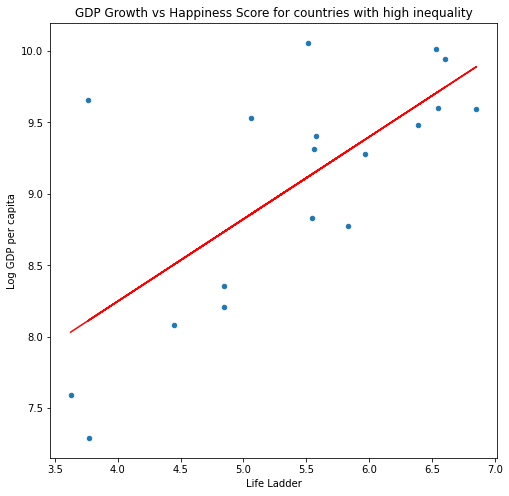

0.7069238390030298


In [51]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
unequal.plot(kind="scatter", x="Life Ladder", y="Log GDP per capita", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with high inequality")

#Calculate the correlation coefficient
happiness = unequal.iloc[:, 2]
gdp = unequal.iloc[:, 3]
correlation = st.pearsonr(happiness, gdp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness, gdp)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)

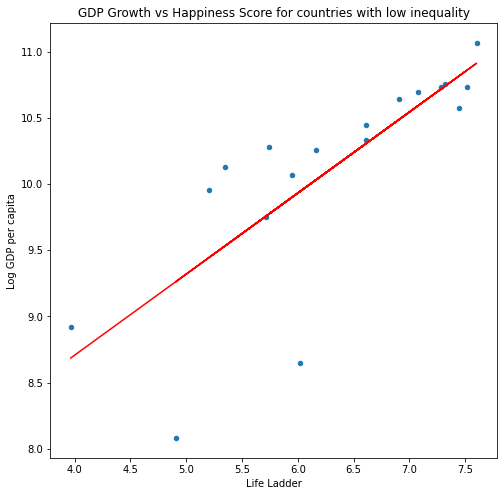

0.7843216387055076


In [52]:
# Scatter plot for GDP vs. Happiness

#use pandas to plot a scatter plot
equal.plot(kind="scatter", x="Life Ladder", y="Log GDP per capita", grid=False, figsize=(8,8),
              title="GDP Growth vs Happiness Score for countries with low inequality")

#Calculate the correlation coefficient
happiness = equal.iloc[:, 2]
gdp = equal.iloc[:, 3]
correlation = st.pearsonr(happiness, gdp)

#Calculate  the linear regression, r squared 
slope, intercept, rvalue, pvalue, stderr = st.linregress(happiness, gdp)
regress_values = happiness * slope + intercept

plt.plot(happiness,regress_values,"r-")

# Saves an image of our chart so that we can view it in a folder
#plt.savefig("../Images/temp_lat.png")
plt.show()
print(rvalue)